# Практическая работа 2

Выполнила: Бабаян Анастасия, ММР214

**Будем анализировать датасет с маркейтинговыми данными о продажах автомобилей, данные взяты с популярного в России сайта с объявлениями о продаже автомобилей**
**Данный анализ теоритически можно использовать при построении маркейтинговой стратегии центра, который занимается подбором/продажей автомобилей**

**Цели:**
1. Определить средние цены автомобилей не старше 5-и лет
2. Определить самые дорогие марки автомобилей с помощью группировки
3. Определить влияние (корреляцию) параметров на цену автомобиля
4. Выполнить статистический анализ данных (обширно, посмотрим на текущие тенденции продаваемых автомобилей)

Подключаем нужные библиотеки

In [194]:
import pandas as pd # библиотека для обработки и анализа данных
import numpy as np #  для работы с многомерными массивами
import seaborn as sns # еще одна библиотека для визуализации данных
import matplotlib.pyplot as plt # библиотека для визуализации данных двумерной графикой

from sklearn.preprocessing import LabelEncoder # для матрицы корреляции, когда преобразуем данные в столбцах

Вычитываем данные из датасета и выводим их

In [118]:
df_cars = pd.read_csv("region41.csv") # читаем наш csv с данными по математике
df_cars.head(10) # выводим первые 10 строк данных

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Toyota,Land Cruiser Prado,Джип 5 дв.,Синий,Дизель,1995.0,168000.0,АКПП,130.0,1860000,3.0 SX Wide limited diesel turbo,1KZ-TE,3.0 LTR,2022-08-20 00:00:00,Петропавловск-Камчатский,https://petropavlovsk-kamchatskiy.drom.ru/toyo...,Внимание! ЕДЕМ СРАЗУ В ГАИ! ТЕХОСМОТР ГОТОВ. Р...,2022-08-20 04:00:00
1,Toyota,Land Cruiser,Джип 5 дв.,Черный,Дизель,NaN,260000.0,Автомат,286.0,2300000,NaN,NaN,NaN,2022-08-20 00:00:00,Вилючинск,https://vilyuchinsk.drom.ru/toyota/land_cruise...,"ПРОДАМ Русских дорог видела очень мало ,ездила...",2022-08-20 04:00:00
2,Toyota,Vitz,Хэтчбек 5 дв.,Синий,Бензин,2019.0,100000.0,Вариатор,95.0,1075000,1.3 F Safety Edition III 4WD,1NR-FE,1.3 LTR,2022-08-20 00:00:00,Петропавловск-Камчатский,https://petropavlovsk-kamchatskiy.drom.ru/toyo...,Май 2019 года выпуска - машине 3 года!!! Uss t...,2022-08-20 04:00:00
3,Toyota,Mark II,Седан,Серый,Бензин,2002.0,239000.0,АКПП,160.0,480000,2.0 Grande Four,1G-FE,2.0 LTR,2022-08-20 00:00:00,Вилючинск,https://vilyuchinsk.drom.ru/toyota/mark_ii/477...,Автомобиль в хорошем состоянии. С документами ...,2022-08-20 04:00:00
4,Toyota,RAV4,Джип 5 дв.,Золотистый,Бензин,2010.0,101000.0,АКПП,170.0,1450000,2.4 AT Long Престиж Плюс,2AZ-FE,2.4 LTR,2022-08-20 00:00:00,Петропавловск-Камчатский,https://petropavlovsk-kamchatskiy.drom.ru/toyo...,Третья машина в семье. Ездила девушка (дом-раб...,2022-08-20 04:00:00
5,Toyota,Cresta,Седан,Серебристый,Бензин,NaN,1000000.0,АКПП,180.0,520000,NaN,NaN,NaN,2022-08-20 00:00:00,Петропавловск-Камчатский,https://petropavlovsk-kamchatskiy.drom.ru/toyo...,Не распил. Турбо. Очень хорошее состояние. Выв...,2022-08-20 04:00:00
6,Toyota,Estima Emina,Минивэн,Серый,Дизель,NaN,420000.0,АКПП,100.0,350000,NaN,NaN,NaN,2022-08-20 00:00:00,Петропавловск-Камчатский,https://petropavlovsk-kamchatskiy.drom.ru/toyo...,двигатель и ходовая в хорошем состоянии. БЕЗ Т...,2022-08-20 04:00:00
7,Toyota,Corolla Axio,Седан,Серый,Бензин,NaN,186000.0,Вариатор,105.0,550000,NaN,NaN,NaN,2022-08-20 00:00:00,Петропавловск-Камчатский,https://petropavlovsk-kamchatskiy.drom.ru/toyo...,"машина 11лет в одних руках, обслуживается по с...",2022-08-20 04:00:00
8,Hummer,H2,Джип 5 дв.,Белый,Бензин,2002.0,95000.0,АКПП,315.0,6777777,6.0 AT Luxury,LQ4,6.0 LTR,2022-08-20 00:00:00,Петропавловск-Камчатский,https://petropavlovsk-kamchatskiy.drom.ru/humm...,Калифорнийская фирма 213 Motoring разработала ...,2022-08-20 04:00:00
9,Mitsubishi,Outlander,Джип 5 дв.,Бежевый,Бензин,2005.0,143000.0,Вариатор,170.0,929000,2.4 CVT Intense E63,4B12,2.4 LTR,2022-08-20 00:00:00,Петропавловск-Камчатский,https://petropavlovsk-kamchatskiy.drom.ru/mits...,"ММС ОУТЛАНДЕР салон ROLF - 2007 12 мес, 2,4 об...",2022-08-20 04:00:00


Проанализируем имеющиеся данные

In [119]:
print(df_cars.info()) # Выведим данные о нашем датасете, чтобы понять, что мы будем анализировать.
print("\n Колличество объектов:", df_maths.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498740 entries, 0 to 1498739
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   brand                 1498740 non-null  object 
 1   name                  1498740 non-null  object 
 2   bodyType              1498740 non-null  object 
 3   color                 1448934 non-null  object 
 4   fuelType              1492145 non-null  object 
 5   year                  915699 non-null   float64
 6   mileage               1491876 non-null  float64
 7   transmission          1491339 non-null  object 
 8   power                 1484500 non-null  float64
 9   price                 1498740 non-null  int64  
 10  vehicleConfiguration  915699 non-null   object 
 11  engineName            915506 non-null   object 
 12  engineDisplacement    914866 non-null   object 
 13  date                  1498740 non-null  object 
 14  location              1498740 non-

Видим, какие у нас есть столбцы в таблице, и видим общее число данных для анализа

Определимся, какие у нас есть столбы и что они означают

**brand** - бренд автомобиля

**name** - марка автомобиля

**bodyType** - тип купзова

**color** - цвет

**fuelType** - тип мотора (бензин / дизель)

**year** - год выпуска

**mileage** - пробег

**power** - лошадинные силы

**price** - цена

**vehicleConfiguration** - комплектация

**engineName** - название двигателя

**engineDisplacement** - объем двигателя в литрах

**date** - дата публикации объявления

**location** - город, где находится автомобиль

**link** - ссылка на объявление

**description** - комментарий владельца

**parse_date** - дата парсинга объявления


In [120]:
is_null_cols = df_cars.isnull() # получаем информацию по нулевым данных в столбцах
is_null_cols.sum() # получаем общий результат по кол-ву нулей в конкретных столбиках

brand                        0
name                         0
bodyType                     0
color                    49806
fuelType                  6595
year                    583041
mileage                   6864
transmission              7401
power                    14240
price                        0
vehicleConfiguration    583041
engineName              583234
engineDisplacement      583874
date                         0
location                     0
link                         0
description              59400
parse_date                   0
dtype: int64

# Подготовка данных

Видим, что у нас есть некоторые столбцы, которые имеют пропуск в данных, поработаем с ними

**color** - цвет автомобиля, посчитаем какой процент составляют нулевые данные от общего числа данных, чтобы определить стратегию заполнения

In [121]:
color_nulls_shapes = df_cars[df_cars['color'].isna()].shape
color_nulls_count = color_nulls_shapes[0]
color_nulls_count

49806

In [122]:
color_notna_shapes = df_cars[df_cars['color'].notna()].shape
color_notna_count = color_notna_shapes[0]
color_notna_count

1448934

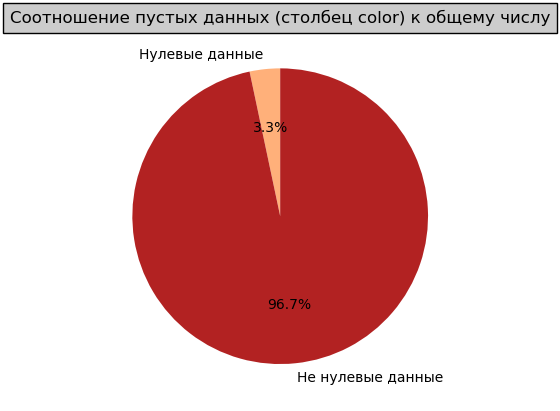

In [123]:
colors = ['#FFB07A', '#B22222']
color_null_analytics = [color_nulls_count, color_notna_count]

labels = 'Нулевые данные', 'Не нулевые данные'

fig, ax = plt.subplots()
ax.pie(color_null_analytics, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Соотношение пустых данных (столбец color) к общему числу", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Видим, что кол-во нулевых данных мало, но составляет достаточную часть для анализа, поэтому данные в этом столбце можно использовать для анализа, предварительно обработав пустые значения

In [124]:
df_cars['color'] = df_cars['color'].fillna("неизвестно") # заполняем нулевые строки значением - неизвестно

Проверим, остались ли нулевые строки в данных

In [125]:
# тк часто будем использовать этот код, обернем его в функцию
def check_column(column_name):
    nulls_count = df_cars[df_cars[column_name].isna()].shape[0]

    if nulls_count == 0:
        print("Нулевых строк нет!")
    else:
        print("Нулевые строки есть")

In [126]:
check_column('color')

Нулевых строк нет!


Теперь поработаем со следующим столбцом 

**fuelType** - тип топлива, которое использует двигатель, посчитаем какой процент составляют нулевые данные от общего числа данных, чтобы определить стратегию заполнения


In [127]:
fuel_type_nulls_shapes = df_cars[df_cars['fuelType'].isna()].shape
fuel_type_nulls_count = fuel_type_nulls_shapes[0]
fuel_type_nulls_count

6595

In [128]:
fuel_type_notna_shapes = df_cars[df_cars['fuelType'].notna()].shape
fuel_type_notna_count = fuel_type_notna_shapes[0]
fuel_type_notna_count

1492145

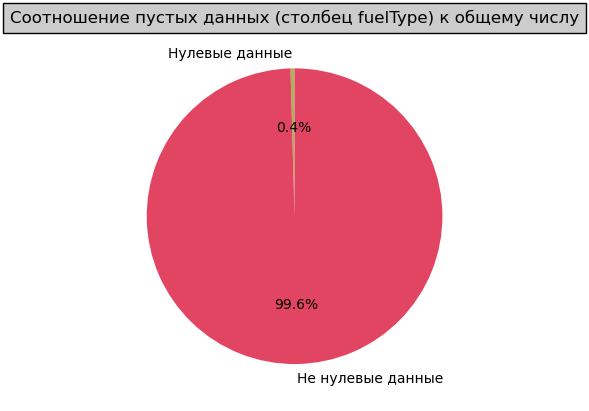

In [129]:
colors = ['#AFB05D', '#E24561']
color_null_analytics = [fuel_type_nulls_count, fuel_type_notna_count]

labels = 'Нулевые данные', 'Не нулевые данные'

fig, ax = plt.subplots()
ax.pie(color_null_analytics, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Соотношение пустых данных (столбец fuelType) к общему числу", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Видим, что значение статистически мало и делаем вывод, что оно не окажет статистического влияния при анализе, поэтому нулевые значения можно удалить

In [130]:
df_cars = df_cars.dropna(subset=['fuelType'])

Проверим, остались ли нулевые строки в данных

In [131]:
check_column('fuelType')

Нулевых строк нет!


Теперь поработаем со следующим столбцом 

**year** - тип топлива, которое использует двигатель, посчитаем какой процент составляют нулевые данные от общего числа данных, чтобы определить стратегию заполнения

In [132]:
year_nulls_shapes = df_cars[df_cars['year'].isna()].shape
year_nulls_count = year_nulls_shapes[0]
year_nulls_count

576446

In [133]:
year_notna_shapes = df_cars[df_cars['year'].notna()].shape
year_notna_count = year_notna_shapes[0]
year_notna_count

915699

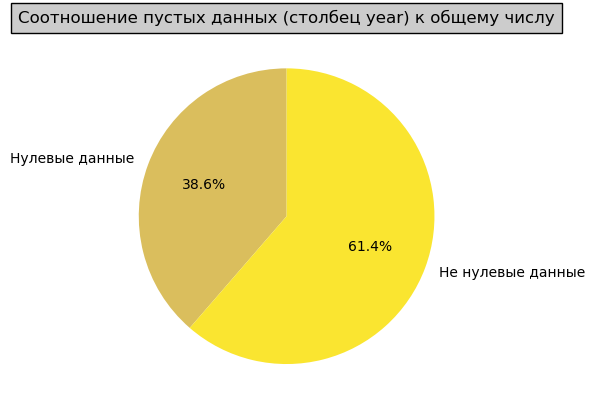

In [134]:
colors = ['#DABE5D', '#FAE530']
color_null_analytics = [year_nulls_count, year_notna_count]

labels = 'Нулевые данные', 'Не нулевые данные'

fig, ax = plt.subplots()
ax.pie(color_null_analytics, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Соотношение пустых данных (столбец year) к общему числу", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Видим, что значение нулевых данных в году приближается, практически, к половине, необходимо обработать такие данные, тк они будут сильно влиять на статистику при анализе.

Но, тк год является значимым параметром при выборе автомобиля, определим его влияние на цену, чтобы понять, какую тактику по работе с этим столбцом выбрать

In [135]:
# высчитаем корреляцию цены от года
df_cars['price'].corr(df_cars['year'])

0.504849592263212

Видим достаточно сильную зависимость данных, поэтому в анализе это будет важно, стратегию с рандомной заменой / заменой по какой-то логике в этом случае применить не можем, поэтому придется пожертвовать данными и отказаться от нулевых строк

In [136]:
df_cars = df_cars.dropna(subset=['year'])

In [137]:
check_column('year')

Нулевых строк нет!


Так как, после нашего измнения произошли достаточно сильные изменения размера датасета, посмотрим как это отразилось на ситуации с нулвыми строкам

In [138]:
is_null_cols = df_cars.isnull() # получаем информацию по нулевым данных в столбцах
is_null_cols.sum() # получаем общий результат по кол-ву нулей в конкретных столбиках

brand                       0
name                        0
bodyType                    0
color                       0
fuelType                    0
year                        0
mileage                  6596
transmission                0
power                     640
price                       0
vehicleConfiguration        0
engineName                193
engineDisplacement        833
date                        0
location                    0
link                        0
description             24757
parse_date                  0
dtype: int64

Видим, что ситуация изменилась не сильно, у нас остаются пустые столбцы, продолжим работу по аналогии и избавимся от пустых строк

**mileage** - пробег автомобиля

In [139]:
mileage_nulls_shapes = df_cars[df_cars['mileage'].isna()].shape
mileage_nulls_count = mileage_nulls_shapes[0]
mileage_nulls_count

6596

In [140]:
mileage_notna_shapes = df_cars[df_cars['mileage'].notna()].shape
mileage_notna_count = year_notna_shapes[0]
mileage_notna_count

915699

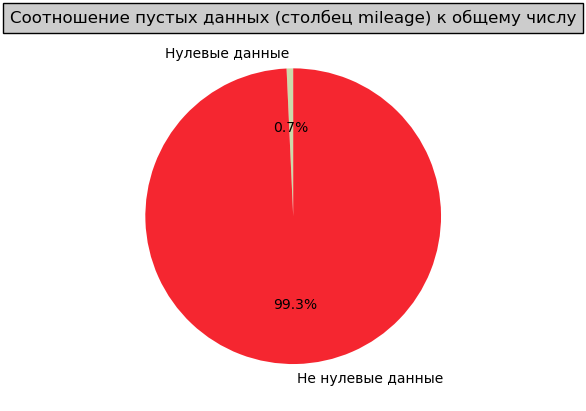

In [141]:
colors = ['#CBDAAA', '#F52630']
color_null_analytics = [mileage_nulls_count, mileage_notna_count]

labels = 'Нулевые данные', 'Не нулевые данные'

fig, ax = plt.subplots()
ax.pie(color_null_analytics, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Соотношение пустых данных (столбец mileage) к общему числу", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Меньше одного процента, воспользуемся стратегией по выбору рандомного элемента для заполнения текущего столбца

In [142]:
df_cars['mileage'] = df_cars['mileage'].fillna(np.random.choice(df_cars['mileage'].dropna()))

In [143]:
check_column('mileage')

Нулевых строк нет!


Аналогично поступим и со столбцом **power** - мощность в лошадинных сиилах

In [144]:
df_cars['power'] = df_cars['power'].fillna(np.random.choice(df_cars['power'].dropna()))

In [145]:
check_column('power')

Нулевых строк нет!


Колонки 

**engineName** - название мотора

**engineDisplacement** - конфигурация мотора

**description** - описание от владельца

**parse_date** - дата парсинга

**date** - дата публикации

**link** - ссылка на объявление

не несут статистической ценности, поэтому от них можно избавиться

In [146]:
df_cars = df_cars.drop(columns=['engineName', 'engineDisplacement', 'description', 'parse_date', 'date', 'link'])

Посмотрим, в каком состоянии находятся наши столбцы и готовы ли они к дальнейшей работе с ними

In [178]:
is_null_cols = df_cars.isnull() # получаем информацию по нулевым данных в столбцах
is_null_cols.sum() # получаем общий результат по кол-ву нулей в конкретных столбиках

brand                   0
name                    0
bodyType                0
color                   0
fuelType                0
year                    0
mileage                 0
transmission            0
power                   0
price                   0
vehicleConfiguration    0
location                0
dtype: int64

Отлично, видим, что у нас нет пустых строк в нашем датасете, поэтому можно приступать к анализу

# Анализ данных

Первым делом хочется определить, как соотношение брендов в продаже

Определим самые популярные бренды

In [209]:
brands = df_cars.groupby("brand").size()

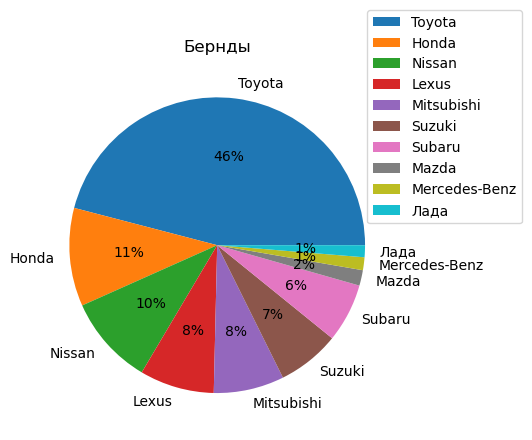

In [248]:
brands = brands.sort_values(ascending=False) # отсортируем по убыванию
brands = brands[:10] # возьмем топ 10 брендов для анализа
    
brands.plot.pie(autopct='%1.0f%%', title = 'Бернды', label="").legend(bbox_to_anchor=(1,1), loc="upper right", bbox_transform=plt.gcf().transFigure)


Видим, что для 41 региона характерны показатели, что Toyota занимает первое место, Honda - второе, в целом, топ 5 распределилось между японсиким производителями, это означает, что спор на японское авто в этом регионе намного выше и сосредоточица можно на них

In [ ]:
Теперь можно посмотреть на распределение по типу двигателя (бензин / дизель)

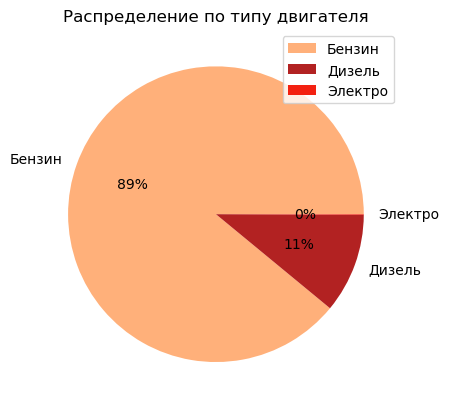

In [252]:
colors = ['#FFB07A', '#B22222', '#F32111']
fuelTypes = df_cars.groupby("fuelType").size()
fuelTypes.plot.pie(autopct='%1.0f%%', colors = colors, title = 'Распределение по типу двигателя', label="").legend()

Можно сделать вывод, что в этом регионе достаточно популярен тип двигателя - бензин, пока что имеем следующую информцию - Бензин + японский производитель

Интересно посмотреть, если взять нашего лидера - Toyota, и посмотреть, какой тип двигателя популярен у этого производителя

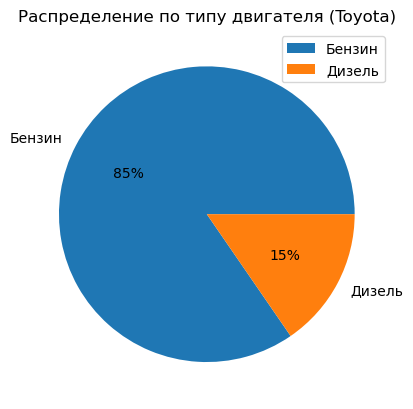

In [255]:
mdata = df_cars.query("`brand` == 'Toyota'")
fuelTypes = mdata.groupby("fuelType").size()
fuelTypes.plot.pie(autopct='%1.0f%%', title = 'Распределение по типу двигателя (Toyota)', label="").legend()

Ситуация примерно такая же, лидирует бензиновый тип двигателя, давайте проанализируем ситуацию по году выпуска автомобиля

In [278]:
years_unsortered = df_cars.groupby("year").size()
years = years_unsortered.sort_values(ascending=False) # отсортируем по убыванию
years = years.iloc[:10] # возьмем топ 10 по кол-ву объявлений с годом
years

year
1998.0    55401
2015.0    51558
2000.0    46327
2002.0    44097
1997.0    43535
2006.0    41127
2017.0    40361
2007.0    40257
2009.0    38928
2010.0    36656
dtype: int64

<AxesSubplot:xlabel='year'>

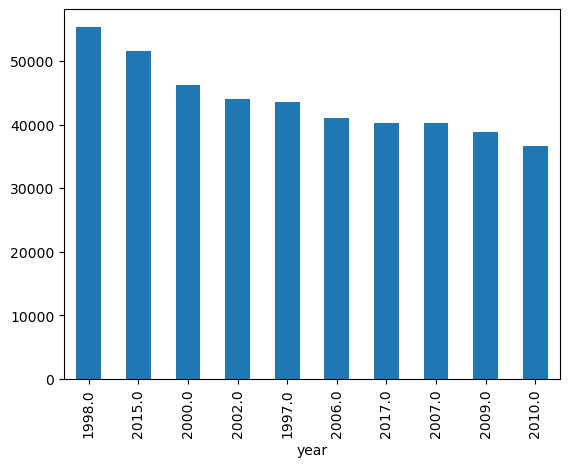

In [279]:
years.plot.bar()

Видим, что популярны авто 1998 и 2015 годов. Можно сделать вывод, что большенство берет машины старые японские из-за надежности. Поэтому услуги подбора авто в этом случае будут очень актуально, тк машины БУ, а 1998 год - достаточно старый, поэтому благодаря анализу можно сделать вывод, что необходимы будут специалисты, которые разбираются в старый японских авто

Посмотрим на распределение цены по годам

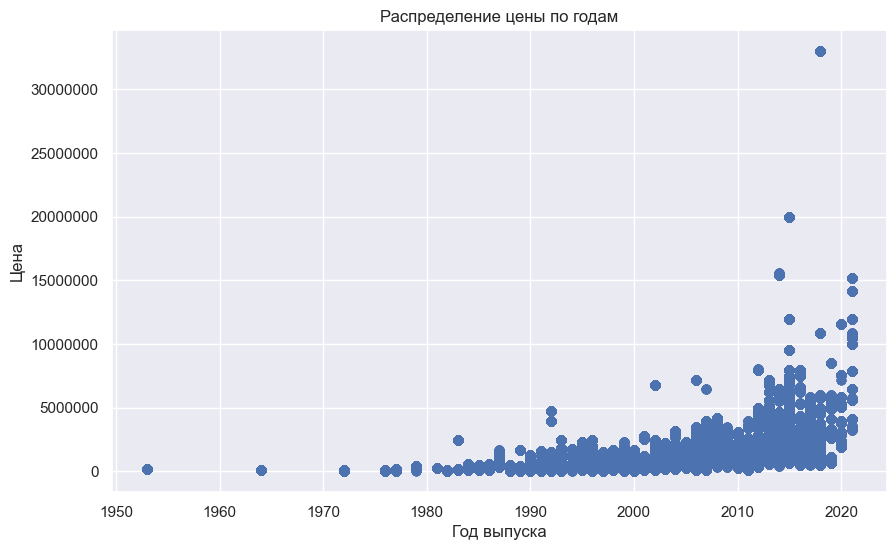

In [353]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_cars['year'], y = df_cars['price'])
plt.title('Распределение цены по годам')
plt.xlabel("Год выпуска")
plt.ylabel("Цена")
plt.ticklabel_format(style = 'plain')
plt.show()

Теперь рассмотрим распределение по цветам, мне нравятся красненькие машинки :)

<AxesSubplot:xlabel='color', ylabel='count'>

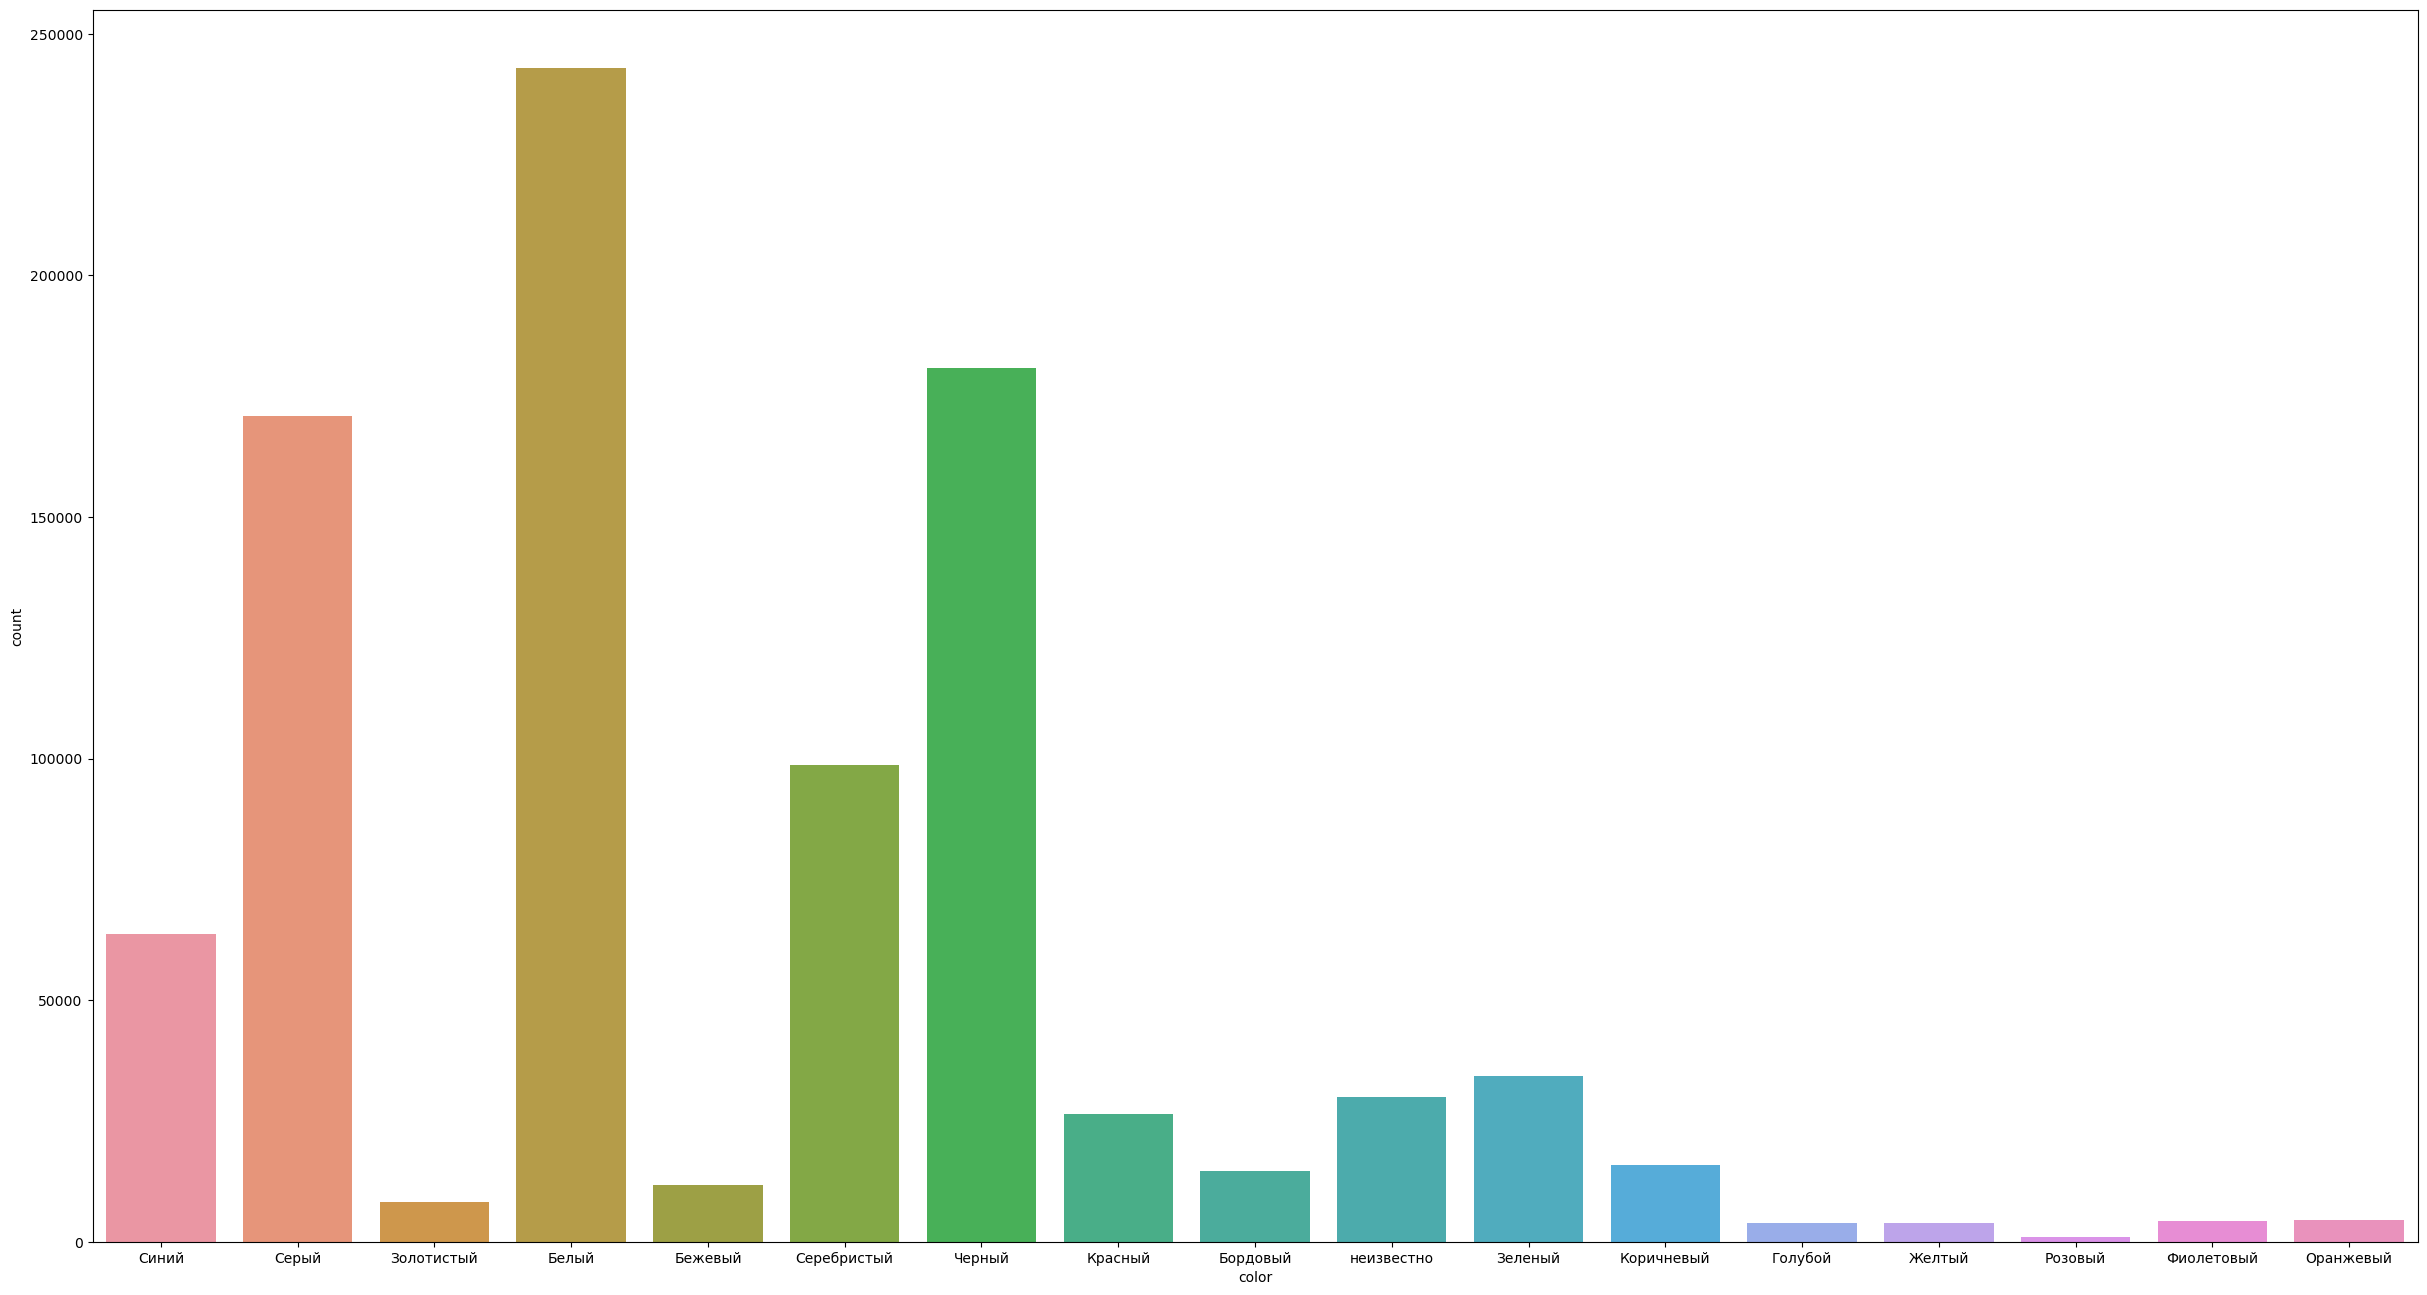

In [341]:
plt.figure(figsize = (30,16))
sns.countplot(x = 'color',data = df_cars)

Красных машин мало, но ничего, зато мы поняли, что спросом пользуются белые автомобили

Посмотрим на машины по типу кузова

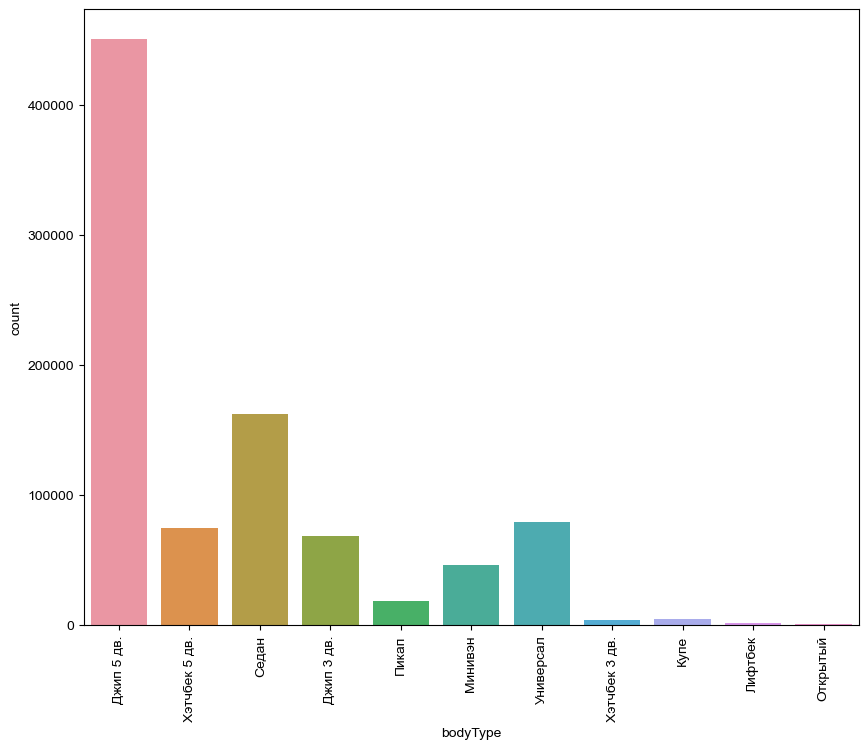

In [343]:
sns.countplot(data = df_cars, x="bodyType")
sns.set(rc={'figure.figsize': (15,12)})
plt.xticks(rotation=90)
plt.show()

Видим, что в продаже больше всего 5-и дверных джипов и седанов, в целом, это неудивительно

In [ ]:
Посмотрим теперь на распределение по цветам по типу кузова

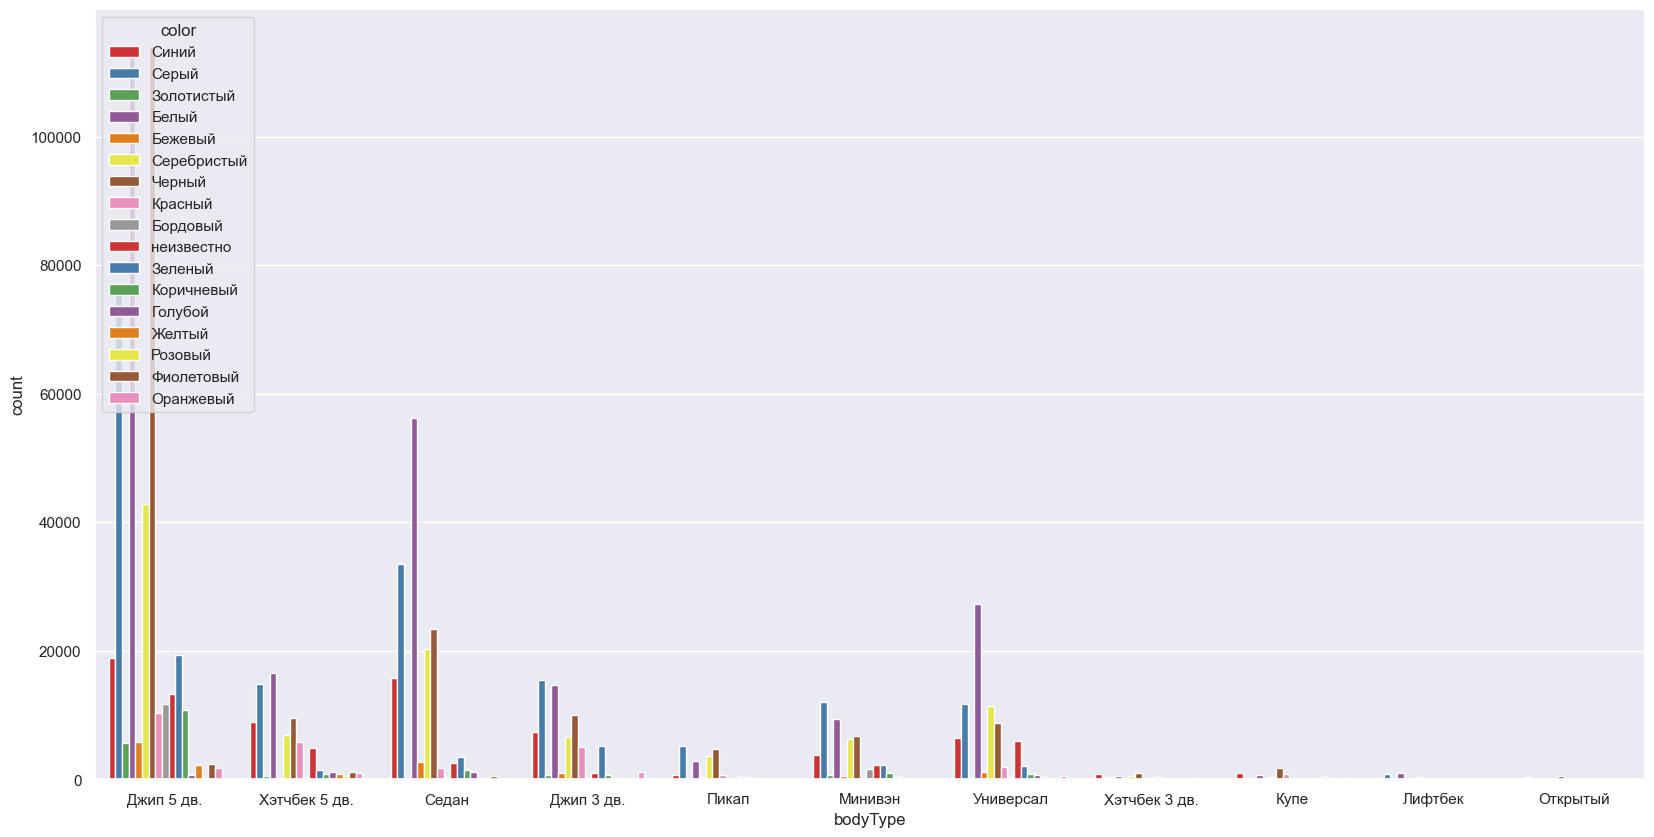

In [346]:
plt.rcParams["figure.figsize"]=[20,10]
sns.countplot(x="bodyType", hue="color", data=df_cars, palette="Set1")
plt.draw()

Проанализируем распределение мощности среди машин

<AxesSubplot:xlabel='power', ylabel='Density'>

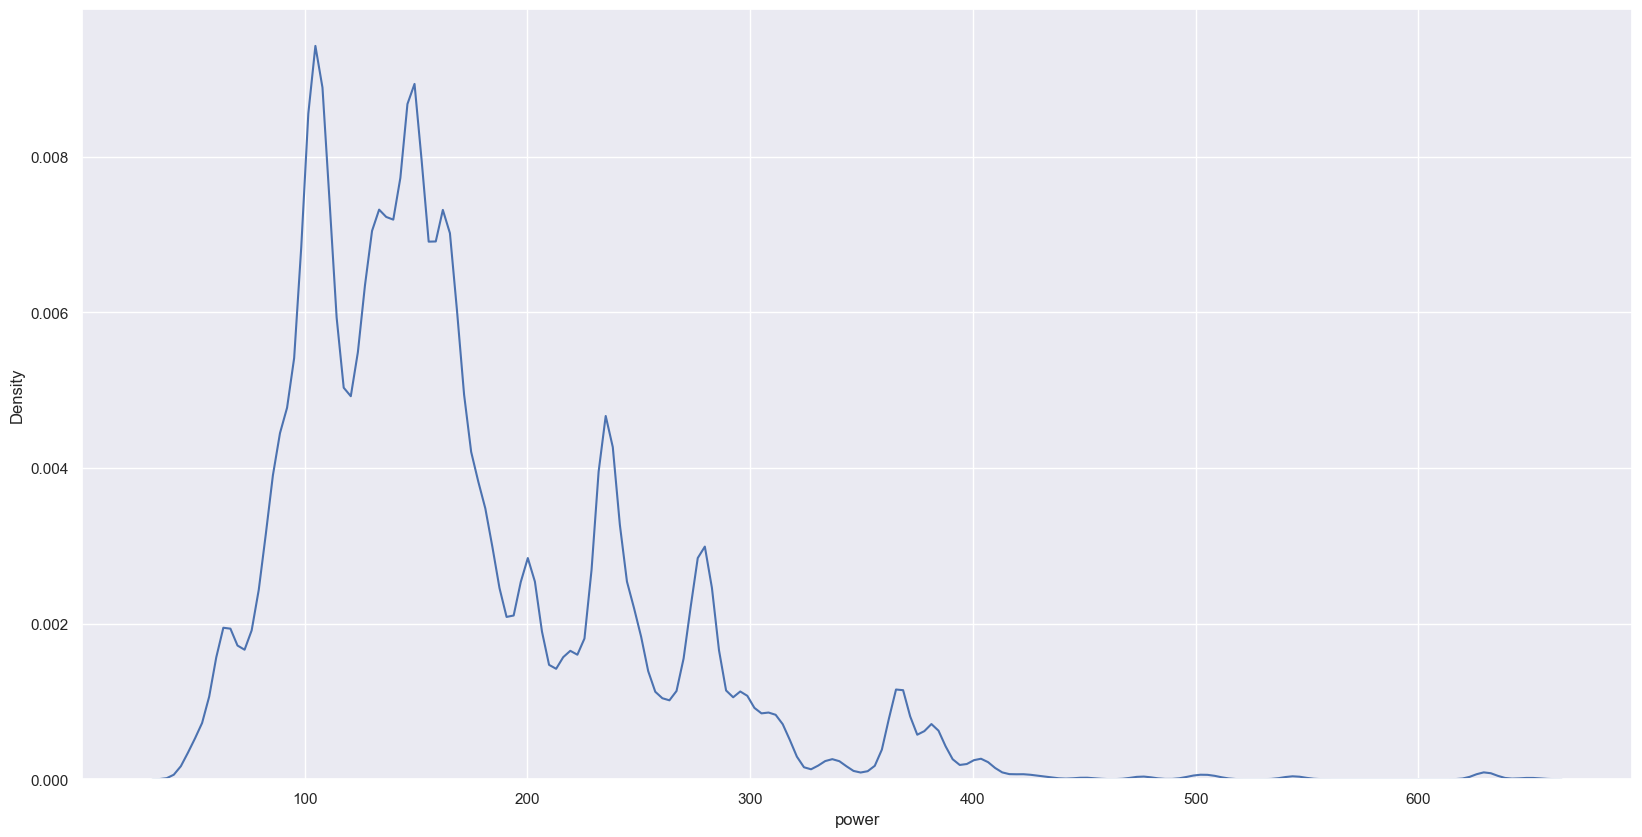

In [347]:
sns.kdeplot(x = 'power', data = df_cars)

Делаем вывод, что большенство машин находятся в диапазоне от 100 до 200 лошадинных сил

Теперь можно определить средние цены автомобилей не старше 5-и лет

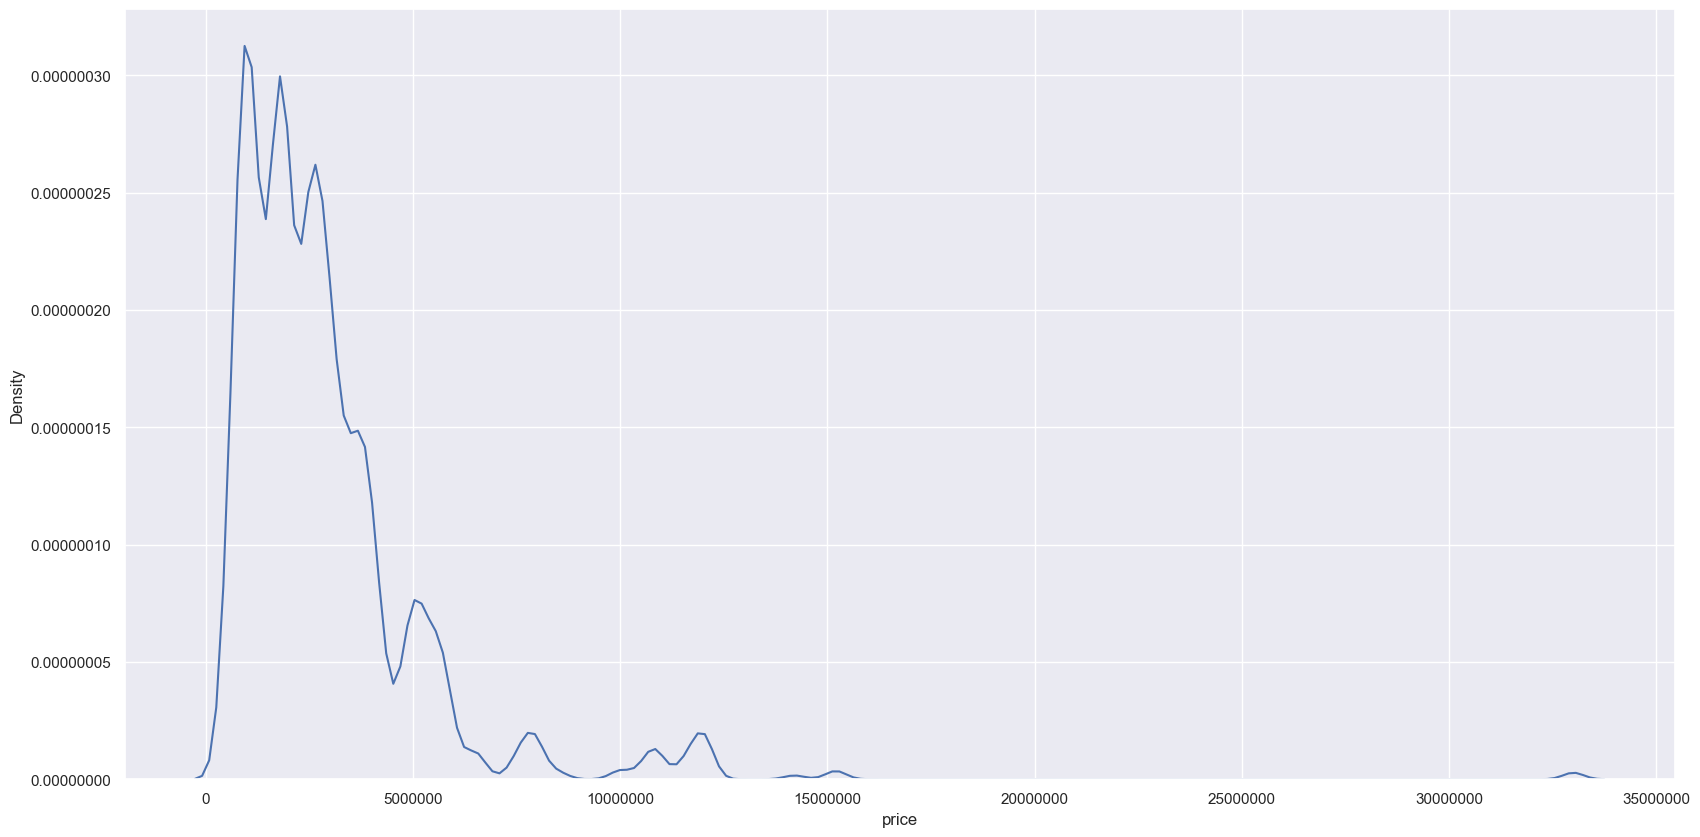

In [352]:
new_cars = df_cars.query("`year` > 2015")
sns.kdeplot(x = 'price', data = new_cars).ticklabel_format(style = 'plain')

и на все автомобили в целом

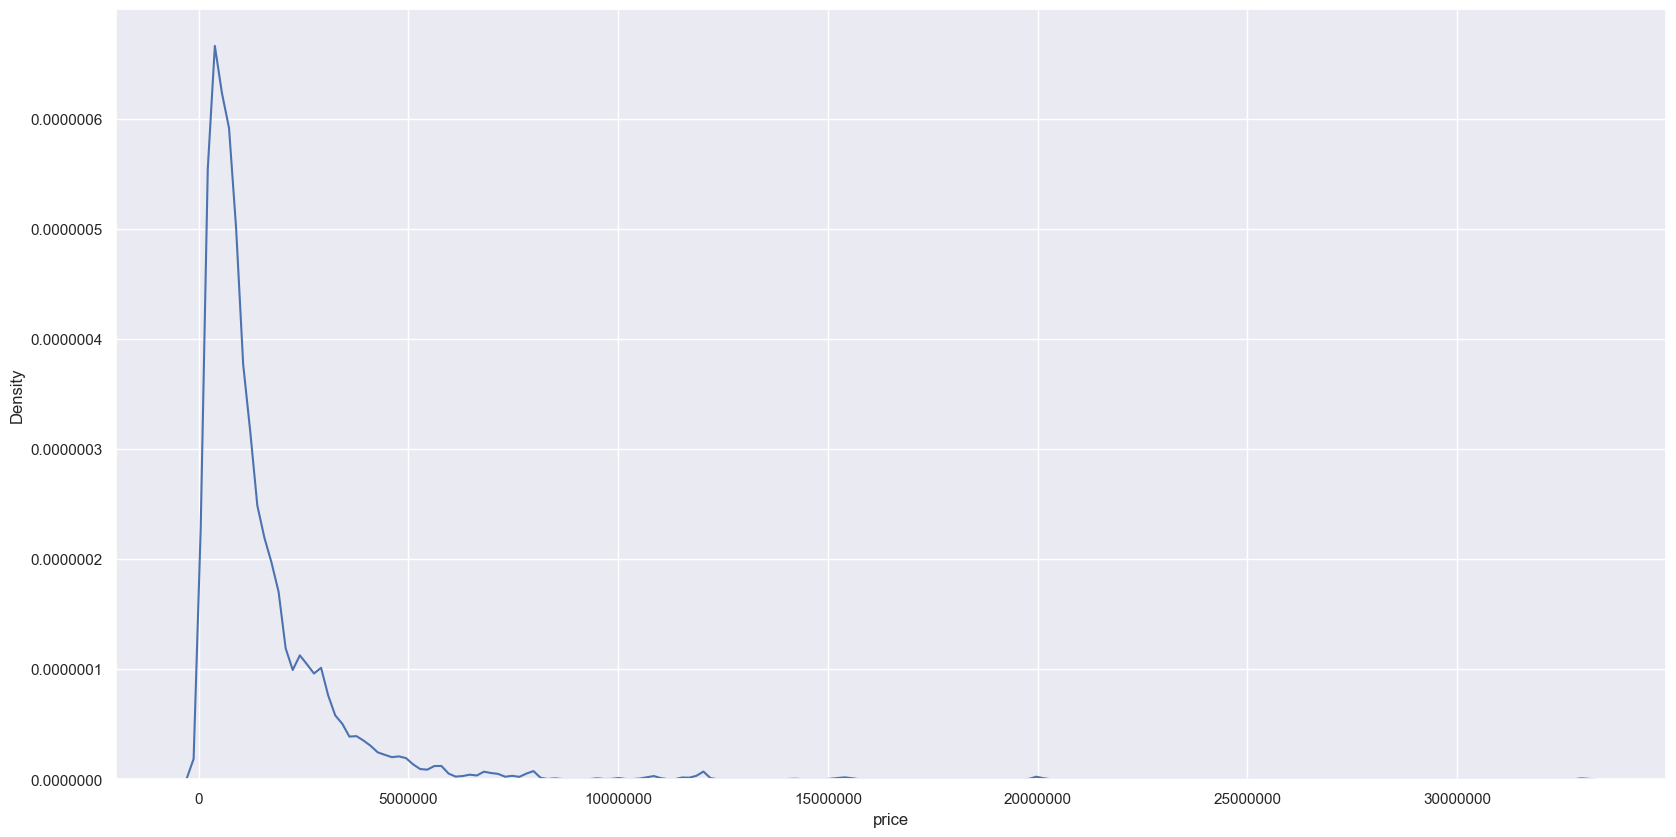

In [355]:
sns.kdeplot(x = 'price', data = df_cars).ticklabel_format(style = 'plain')

In [ ]:
Делаем вывод, что средняя цена находится в районе 2-3 млн

In [364]:
new_cars['price'].quantile(0.75) # считаем 75 квантиль

3575000.0

In [366]:
new_cars['price'].median() # медиана

2390000.0

In [374]:
q1 = new_cars['price'].quantile(0.25)
q1
q3 = new_cars['price'].quantile(0.75)
iqr = q3 - q1

In [375]:
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print(iqr_outlier_threshold_bottom)
print(iqr_outlier_threshold_up)

-1862500.0
6837500.0


In [381]:
shape = new_cars[new_cars['price'] < iqr_outlier_threshold_up]

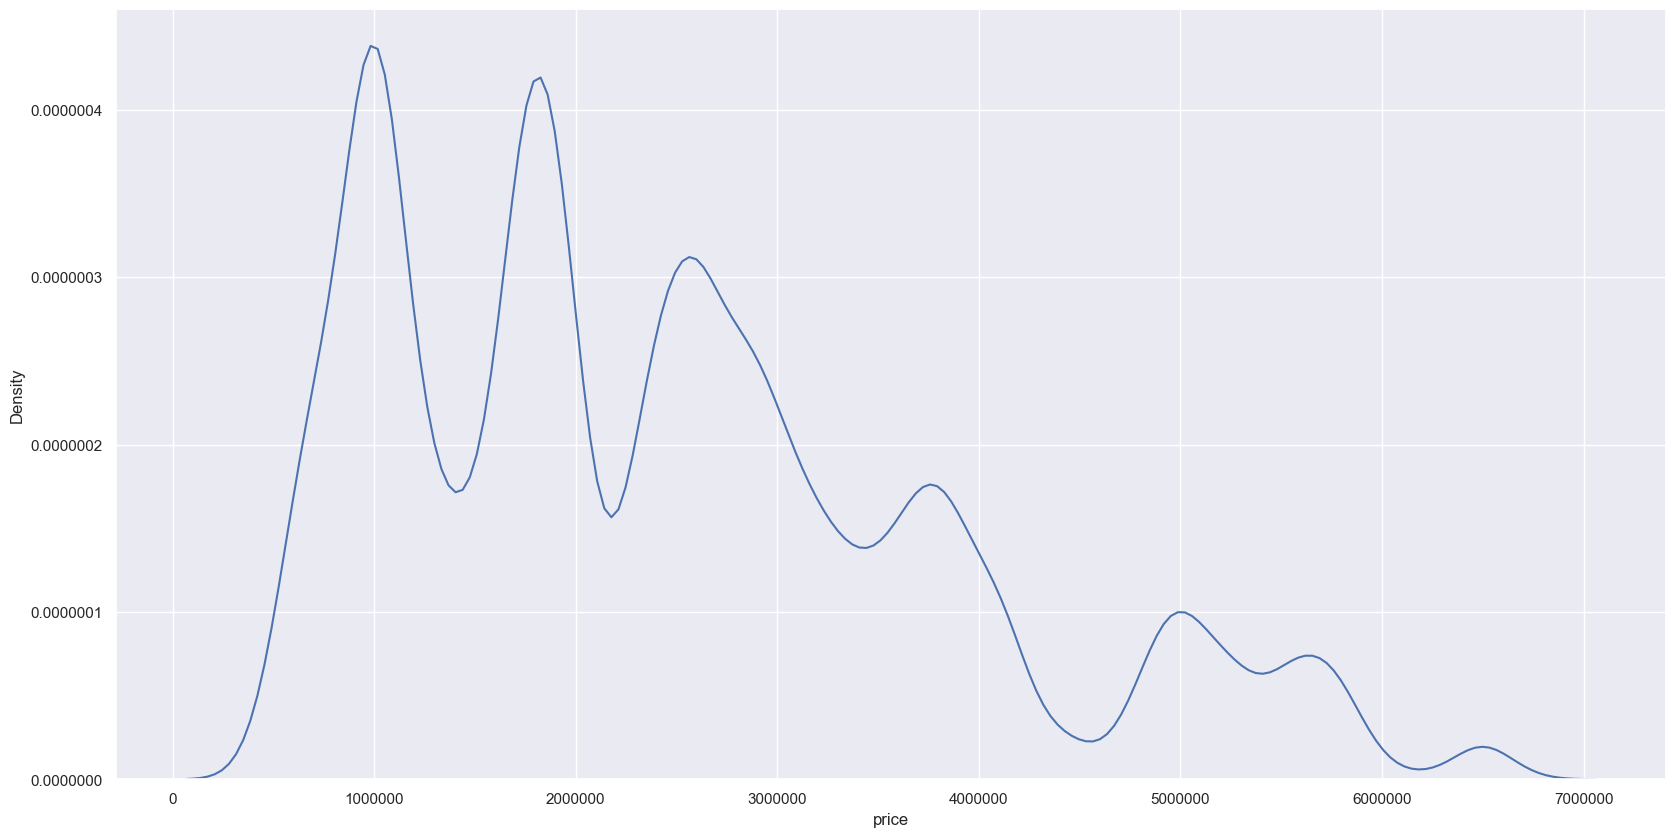

In [382]:
sns.kdeplot(x = 'price', data = shape).ticklabel_format(style = 'plain')

После борьбы со вбросами видим, что есть завышения, но сиутация изменилась не особо, наблюдаем картину от 1 до 3 млн в большом кол-ве 

Теперь найдем самые дорогие авто по брендам

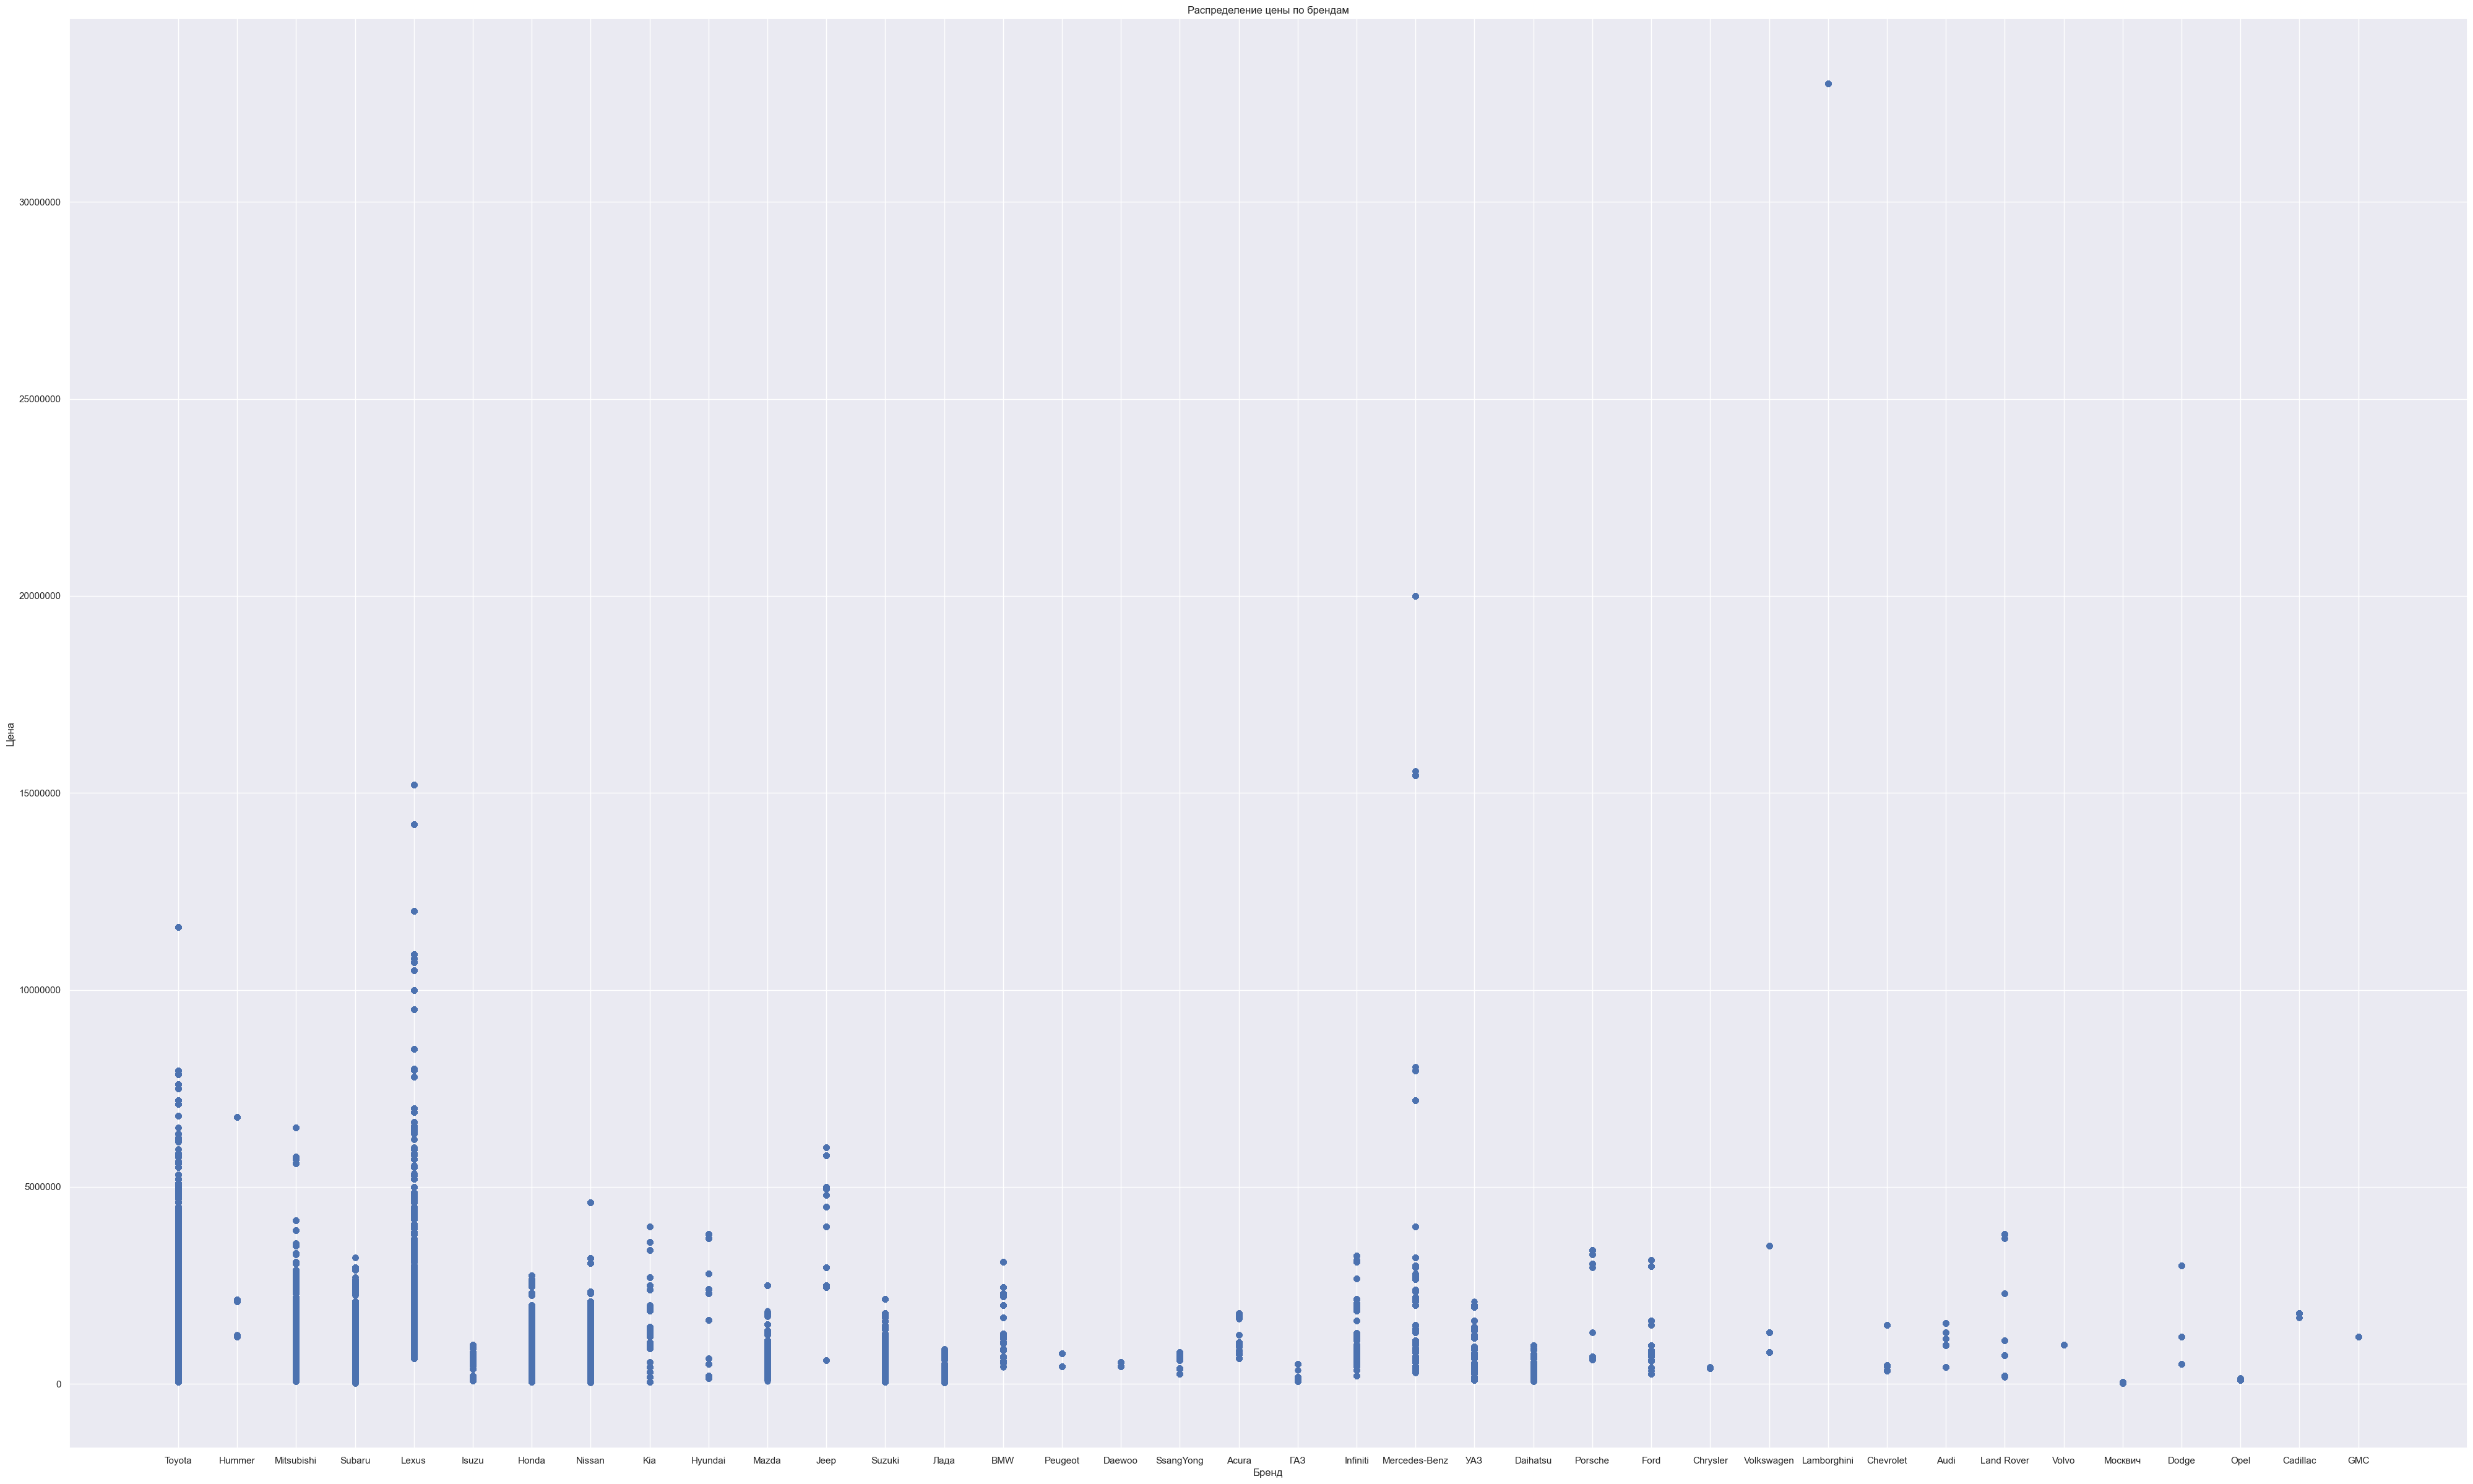

In [401]:
fig, ax = plt.subplots(figsize=(50, 30))
ax.scatter(x = df_cars['brand'], y = df_cars['price'])
plt.title('Распределение цены по брендам')
plt.xlabel("Бренд")
plt.ylabel("Цена")
plt.ticklabel_format(style = 'plain', axis='y')
plt.show()

Самый дорогой бренд мерседес, но если смотреть на кол-во объявлений о продажах, то японский lexus выходит вперед в этом топе 

Построим матрицу корреляции для понимания того, что большего всего влияет на оценку

In [403]:
df_cars.corr()

,year,mileage,power,price
year,1.000000,-0.607653,0.141961,0.504850
mileage,-0.607653,1.000000,-0.012173,-0.352237
power,0.141961,-0.012173,1.000000,0.551921
price,0.504850,-0.352237,0.551921,1.000000


<AxesSubplot:>

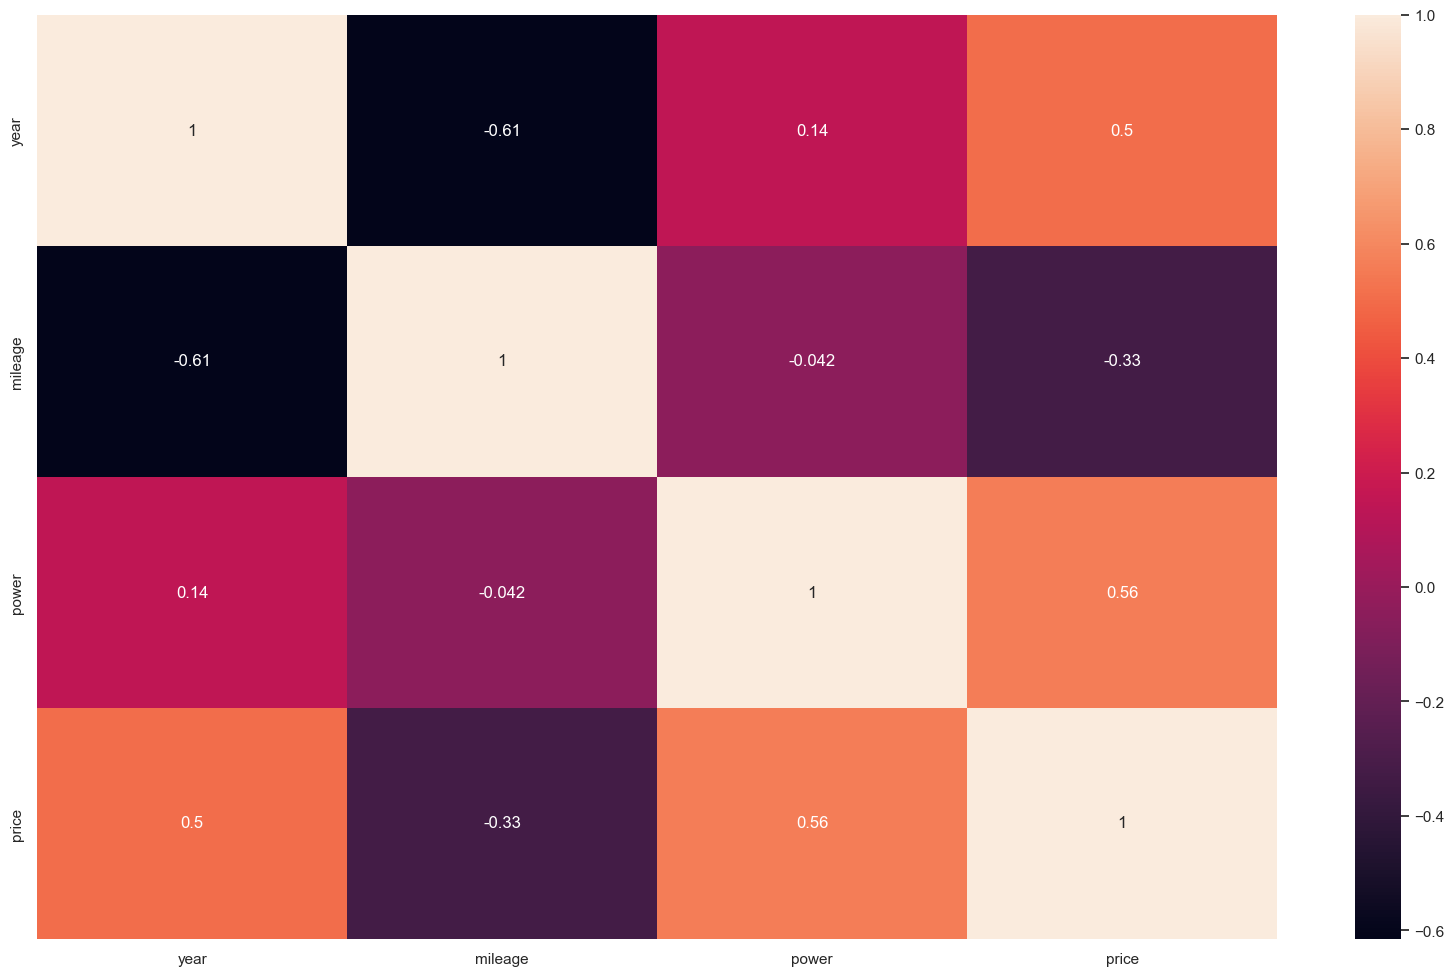

In [404]:
plt.figure(figsize=(20,12)) # настроим размеры
sns.heatmap(df_maths.corr(), annot=True)

Мы видим, что не все значения попали в матрицу корреляции, это произошло из-за того, что не все они были преобразованы в числа, нужно это исправить

In [406]:
# выполняем преобразование колонок, которые не являются числами
new_df_cars = df_cars.copy()

encoder = LabelEncoder()

new_df_cars['brand'] = encoder.fit_transform(new_df_cars['brand'])
new_df_cars['name'] = encoder.fit_transform(new_df_cars['name'])
new_df_cars['bodyType'] = encoder.fit_transform(new_df_cars['bodyType'])
new_df_cars['color'] = encoder.fit_transform(new_df_cars['color'])
new_df_cars['fuelType'] = encoder.fit_transform(new_df_cars['fuelType'])
new_df_cars['transmission'] = encoder.fit_transform(new_df_cars['transmission'])
new_df_cars['vehicleConfiguration'] = encoder.fit_transform(new_df_cars['vehicleConfiguration'])
new_df_cars['location'] = encoder.fit_transform(new_df_cars['location'])

<AxesSubplot:>

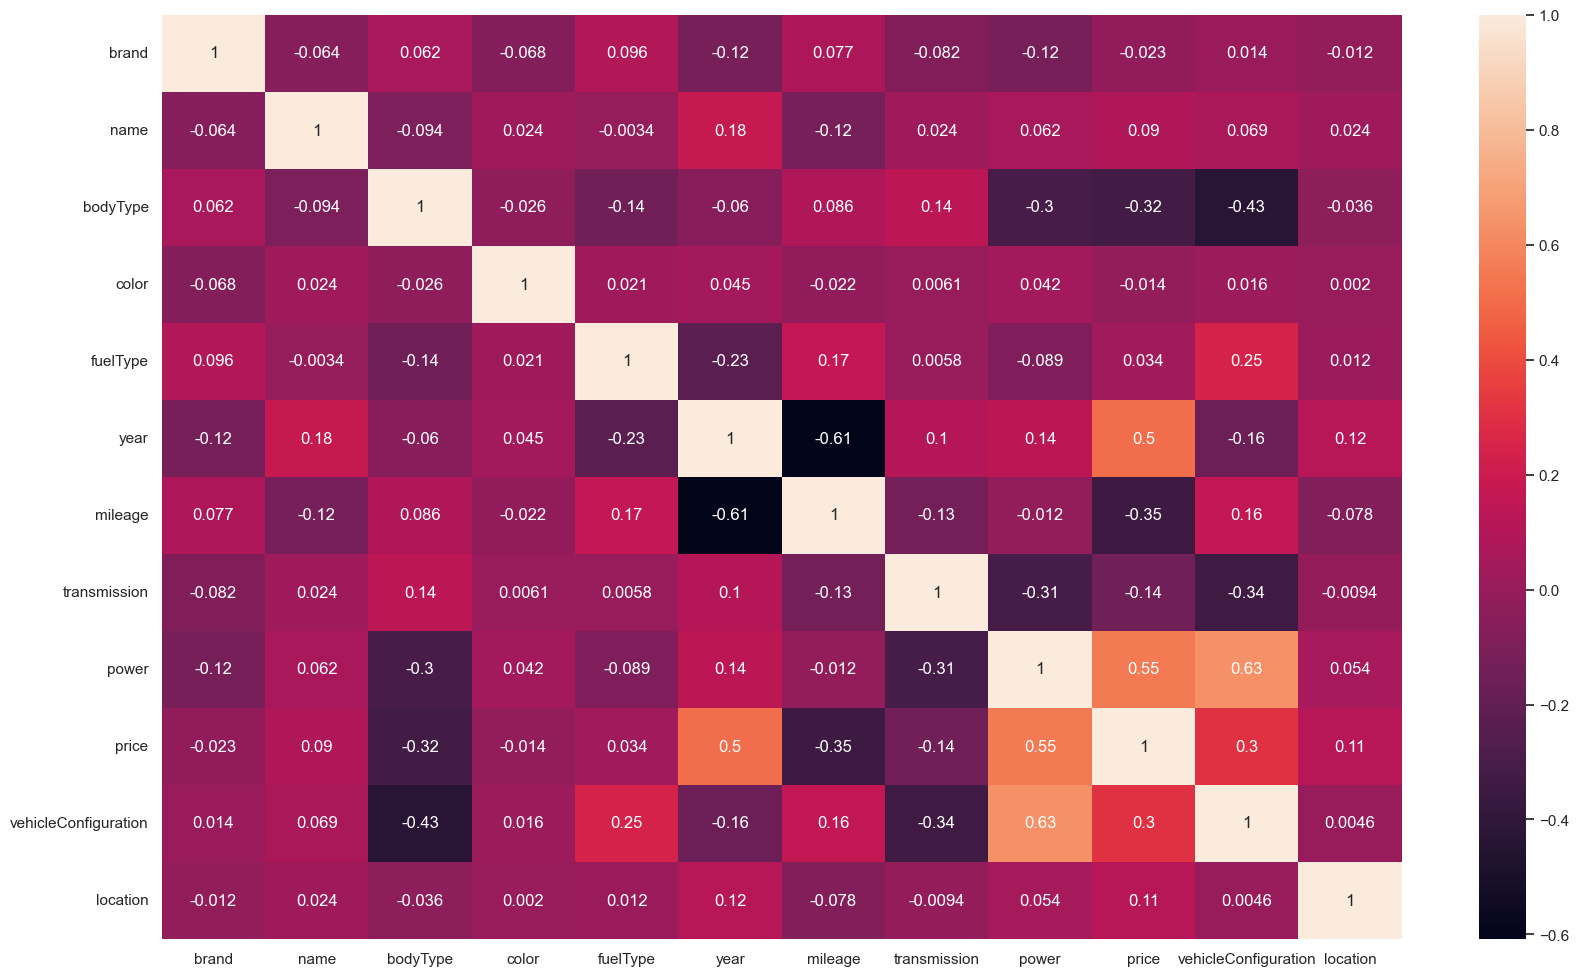

In [408]:
plt.figure(figsize=(20,12)) # настроим размеры
sns.heatmap(new_df_cars.corr(), annot=True)

Преобразуем нашу матрицу, избавимся от полей, кроме цены

In [409]:
corr_matrix = new_df_cars.corr()

# Изолируем нашу оценку
corr_target = corr_matrix[['price']].drop(labels=['price'])
corr_target

,price
brand,-0.023047
name,0.090078
bodyType,-0.323556
color,-0.013813
fuelType,0.033618
year,0.504850
mileage,-0.352237
transmission,-0.144277
power,0.551921
vehicleConfiguration,0.303103


<AxesSubplot:>

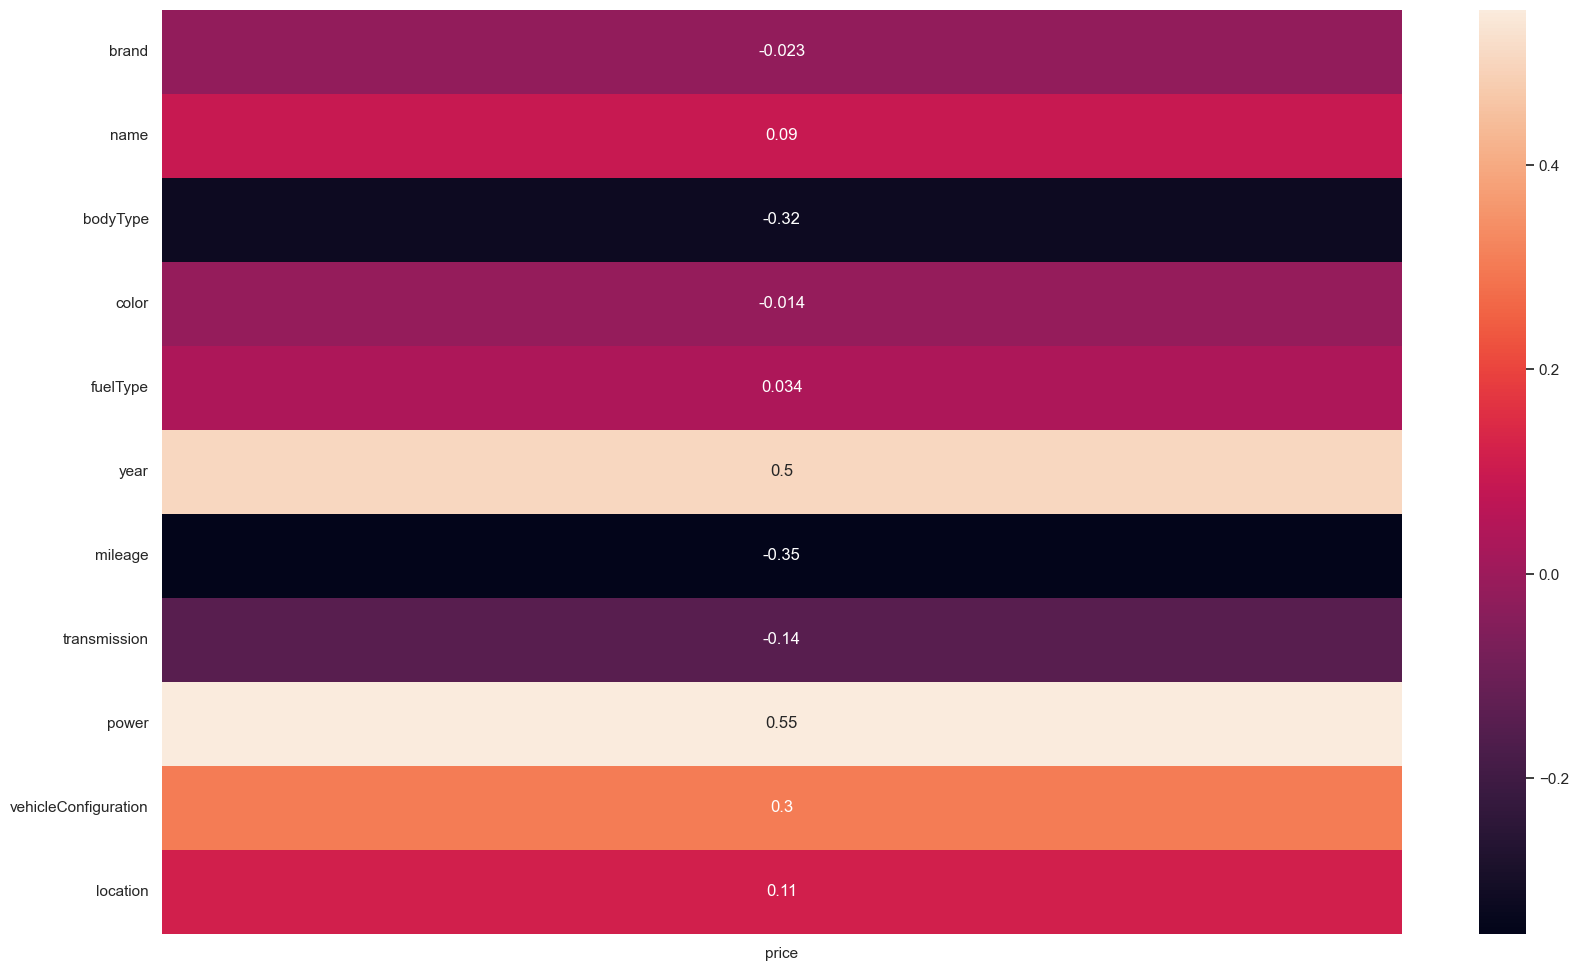

In [410]:
plt.figure(figsize=(20,12)) # настроим размеры
sns.heatmap(corr_target, annot=True)

Видим, что данных, которые не коррелирует много, предлагаю отфильтровать их по корреляции выше 0.2

In [412]:
corr_target = corr_matrix[['price']].drop(labels=['price']).query("`price` > 0.2")
corr_target

,price
year,0.504850
power,0.551921
vehicleConfiguration,0.303103


<AxesSubplot:>

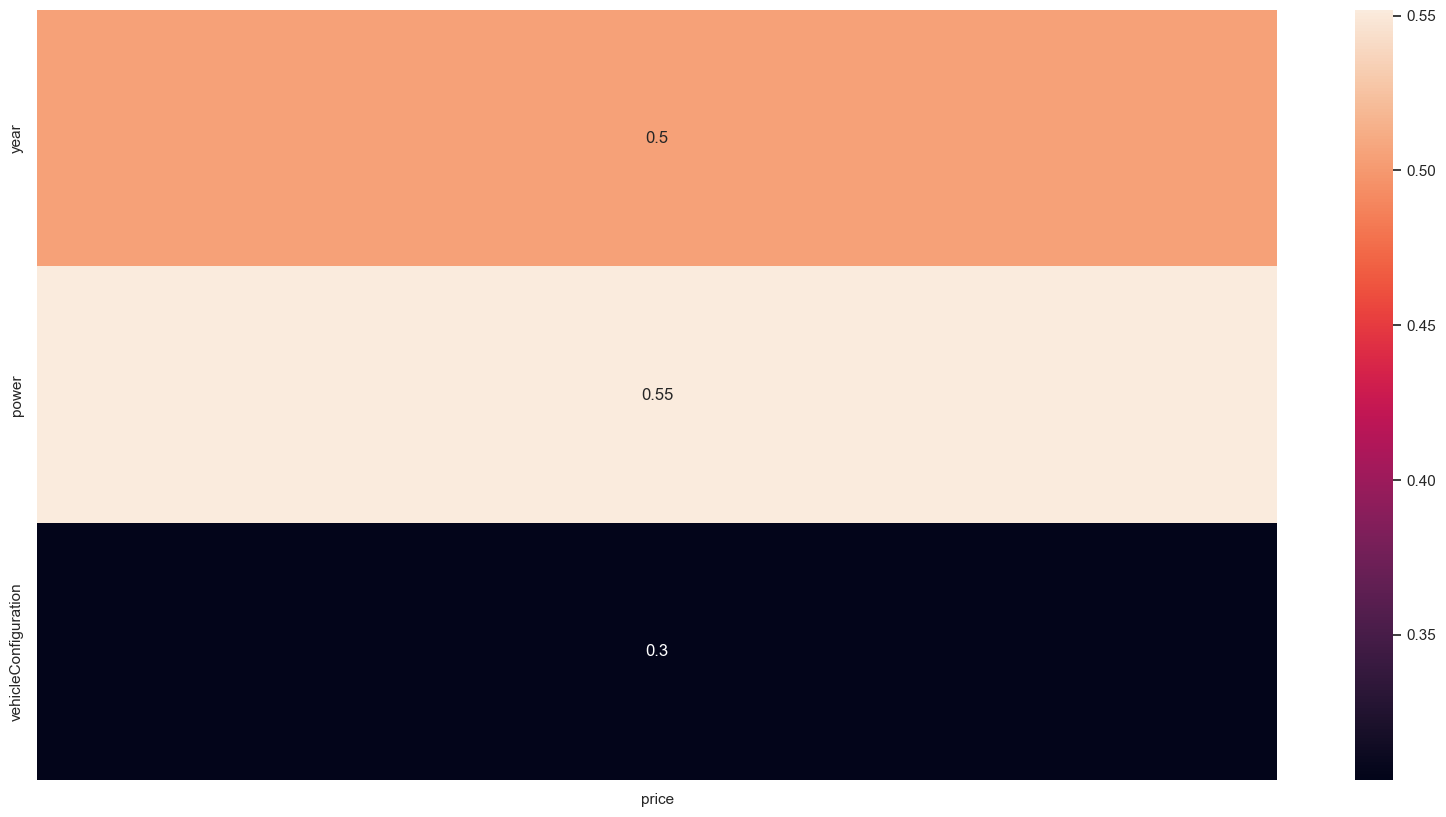

In [413]:
sns.heatmap(corr_target, annot=True)

Из матрицы видим, что самое большое влияние на цену оказывает лошадинные силы, а далее год, что логично, поэтому наша гипотеза подтвердилась

# Выводы 

Поставленные цели выполнены
1. Определить средние цены автомобилей не старше 5-и лет (2-3 млн)
2. Определить самые дорогие марки автомобилей с помощью группировки (мерседес + лексус)
3. Определить влияние (корреляцию) параметров на цену автомобиля (год + лошадинные силы)
4. Выполнить статистический анализ данных (посмотрели, определили стартегию для открытия своего салона подбора авто)